<a href="https://colab.research.google.com/github/fardhinshaik/customer-churn-analysis-retention-insights/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('telco_churn.xlsx')

# Show first 5 rows
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.shape


(7043, 33)

In [4]:
df['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


In [5]:
df['Churn Label'].value_counts(normalize=True) * 100

,proportion
Churn Label,
No,73.463013
Yes,26.536987


### Churn Overview
- The dataset shows a significant portion of customers have churned.
- Approximately one-fourth of customers have discontinued the service.
- This indicates a strong need to analyze churn drivers and retention strategies.


In [6]:
df['Contract'].value_counts()


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [7]:
df.groupby('Contract')['Churn Label'].value_counts(normalize=True) * 100


Contract        Churn Label
Month-to-month  No             57.290323
                Yes            42.709677
One year        No             88.730482
                Yes            11.269518
Two year        No             97.168142
                Yes             2.831858
Name: proportion, dtype: float64

### Churn vs Contract Type
- Customers on month-to-month contracts show the highest churn rate.
- One-year and two-year contract customers are significantly more stable.
- Long-term contracts appear to reduce churn risk considerably.


In [8]:
df.groupby('Churn Label')['Monthly Charges'].mean()


,Monthly Charges
Churn Label,
No,61.265124
Yes,74.441332


### Churn vs Monthly Charges
- Customers who churn tend to have higher average monthly charges.
- Pricing appears to be a contributing factor to customer churn.
- Discounting or targeted pricing strategies could help retain high-risk customers.


In [10]:
df.groupby('Churn Label')['CLTV'].mean()


,CLTV
Churn Label,
No,4490.921337
Yes,4149.414660


### Churn vs Customer Lifetime Value (CLTV)
- Customers who churn have a lower average CLTV compared to retained customers.
- High-value customers tend to remain loyal for longer periods.
- Retention strategies should prioritize protecting high-CLTV customers.


## Final Summary

This project focused on analyzing customer churn behavior using telecom customer data.
The objective was to identify key factors contributing to churn and provide data-driven
insights to support customer retention strategies.

### Key Findings
- Customers on month-to-month contracts exhibit significantly higher churn compared to long-term contracts.
- Higher monthly charges are associated with increased churn, indicating price sensitivity.
- Customers who churn generally have lower Customer Lifetime Value (CLTV).
- Contract type and pricing emerge as the strongest drivers of churn.

### Business Recommendations
- Encourage customers to move from month-to-month contracts to longer-term contracts through incentives.
- Introduce targeted discounts or offers for high-risk customers with high monthly charges.
- Focus retention efforts on high-CLTV customers to protect long-term revenue.
- Improve onboarding and engagement strategies for customers at early stages.


In [11]:
import numpy as np

# Average monthly charges using NumPy
avg_monthly_charge = np.mean(df['Monthly Charges'])
avg_monthly_charge


np.float64(64.76169246059918)

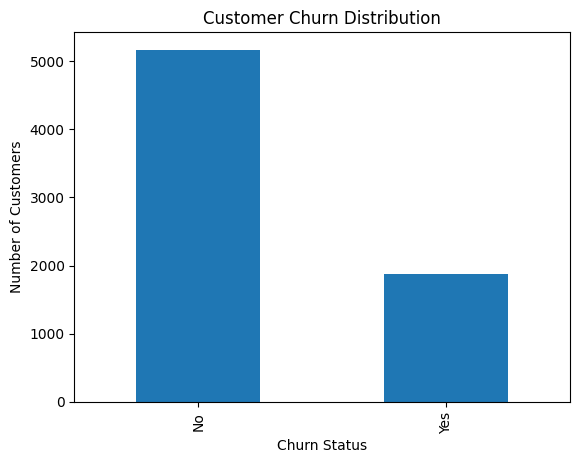

In [12]:
import matplotlib.pyplot as plt

# Churn distribution
df['Churn Label'].value_counts().plot(kind='bar')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()


In [13]:
df['Risk Segment'] = 'Low Risk'

df.loc[
    (df['Contract'] == 'Month-to-month') & (df['Monthly Charges'] > df['Monthly Charges'].mean()),
    'Risk Segment'
] = 'High Risk'

df['Risk Segment'].value_counts()


,count
Risk Segment,
Low Risk,4743
High Risk,2300


In [14]:
df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True) * 100


Payment Method             Churn Label
Bank transfer (automatic)  No             83.290155
                           Yes            16.709845
Credit card (automatic)    No             84.756899
                           Yes            15.243101
Electronic check           No             54.714588
                           Yes            45.285412
Mailed check               No             80.893300
                           Yes            19.106700
Name: proportion, dtype: float64

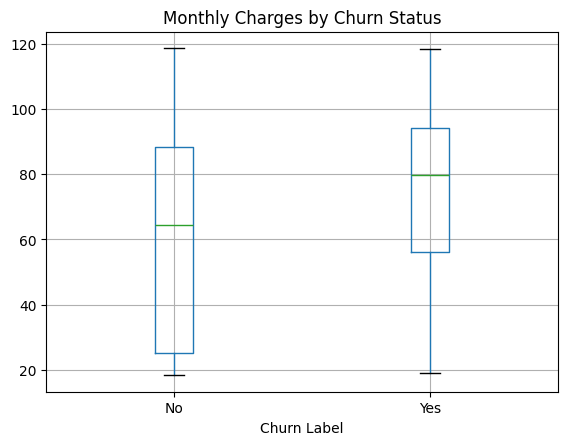

In [15]:
df.boxplot(column='Monthly Charges', by='Churn Label')
plt.title('Monthly Charges by Churn Status')
plt.suptitle('')
plt.show()


### Limitations of the Analysis
- The analysis is based on historical data and does not include real-time behavior.
- No predictive model was built; insights are based on exploratory analysis.
- External factors influencing churn were not available in the dataset.


In [16]:
# Create a new column for customer risk segmentation
df['Risk Segment'] = 'Low Risk'

# Define high-risk customers
df.loc[
    (df['Contract'] == 'Month-to-month') &
    (df['Monthly Charges'] > df['Monthly Charges'].mean()),
    'Risk Segment'
] = 'High Risk'

# Define medium-risk customers
df.loc[
    (df['Contract'] == 'Month-to-month') &
    (df['Risk Segment'] != 'High Risk'),
    'Risk Segment'
] = 'Medium Risk'

# Check distribution
df['Risk Segment'].value_counts()


,count
Risk Segment,
Low Risk,3168
High Risk,2300
Medium Risk,1575


### Customer Risk Segmentation
- Customers were segmented into High, Medium, and Low risk groups using contract type and monthly charges.
- Month-to-month customers with higher monthly charges were identified as the highest churn-risk segment.
- This segmentation helps prioritize retention efforts on the most vulnerable customers.


In [17]:
df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True) * 100


Payment Method             Churn Label
Bank transfer (automatic)  No             83.290155
                           Yes            16.709845
Credit card (automatic)    No             84.756899
                           Yes            15.243101
Electronic check           No             54.714588
                           Yes            45.285412
Mailed check               No             80.893300
                           Yes            19.106700
Name: proportion, dtype: float64

### Churn vs Payment Method
- Customers using electronic check payment methods show higher churn rates.
- Customers enrolled in automatic payment methods exhibit lower churn.
- Encouraging auto-pay enrollment could help improve customer retention.
